# Using Hood - Hud continuum data from Johnson 1990 (J Phon)

In [1]:
%load_ext autoreload
import GCMPy as gp
%aimport GCMPy
%autoreload 1
import math
import random
import matplotlib.pyplot as plt
#%matplotlib inline
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.optimize import minimize
import seaborn as sns

sns.set(style='ticks', context='notebook')
colors=["#045447","#A6262E","#FFBB00","#253060","#8EAB27","#36B5AA"]
sns.set_palette(colors)

In [2]:
pb52=pd.read_csv('pb52.csv')
pbbark = gp.HzToBark(pb52,["F0","F1","F2","F3"])
pbbark.sample(5)

,type,gender,speaker,vowel,repetition,F0,F1,F2,F3,z0,z1,z2,z3
576,m,m,29,GOOSE,1,133,333,800,2130,1.173645,3.363471,7.241014,13.432176
1502,c,f,76,KIT,1,308,590,2760,3500,3.110864,5.673098,15.147034,16.655897
866,w,f,44,TRAP,1,237,1020,1900,2960,2.362112,8.646577,12.666632,15.599593
1287,c,f,65,TRAP,2,245,1050,2420,4000,2.448889,8.822326,14.282831,17.463289
459,m,m,23,NURSE,2,118,510,1280,1650,0.992416,5.005668,10.061605,11.723878


In [3]:
j90=pd.read_csv('johnson1990.csv')
j90bark=gp.HzToBark(j90,["F0","F1","F2","F3"])
j90bark

,vowel,F0,F1,F2,F3,z0,z1,z2,z3
0,FOOT,120,474,1111,2416,1.016731,4.691011,9.169092,14.271865
1,STRUT,120,578,1189,2464,1.016731,5.575666,9.592925,14.402152
2,FOOT,240,474,1111,2416,2.394727,4.691011,9.169092,14.271865
3,STRUT,240,578,1189,2464,2.394727,5.575666,9.592925,14.402152


In [4]:
cval=25
dimsvals={'z0':1,'z1':.761,'z2':.681,'z3':.407}
dimslist = list(dimsvals.keys())
catslist=['vowel','type']

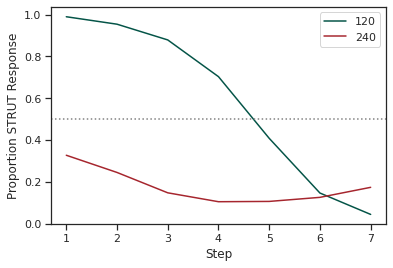

In [5]:
startvowel = "STRUT"
endvowel = "FOOT"
speakerlist = [120,240]
sptype = "F0"
stimdata = j90bark.copy()
clouddata = pbbark.copy()
datalist = []


for sp in speakerlist:
    # set start and end
    strt = {"vowel":startvowel,sptype:sp}
    nd = {"vowel":endvowel,sptype:sp}
    # make continuum
    cnt = gp.continuum(stimdata,strt,nd,dimslist,steps=7,stimdetails=False)
    # make choices
    chcs = gp.multicat(cnt,clouddata,catslist,dimsvals,cval,exclude_self=True, N=1,fc={"vowel":[startvowel,endvowel]})
    datalist.append(chcs)

gp.cpplot(datalist,"vowel", speakerlist)



## Compare to Peterson & Barney "m" and "w" averages

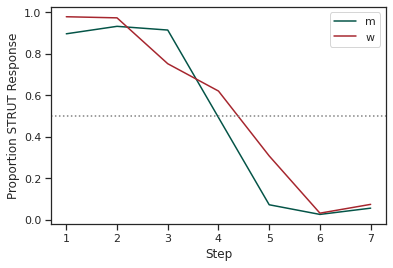

In [6]:
startvowel = "STRUT"
endvowel = "FOOT"
speakerlist = ["m","w"]
sptype = "type"
stimdata = gp.datasummary(pbbark,catslist,dimslist)
clouddata = pbbark.copy()
datalist = []


for sp in speakerlist:
    # set start and end
    strt = {"vowel":startvowel,sptype:sp}
    nd = {"vowel":endvowel,sptype:sp}
    # make continuum
    cnt = gp.continuum(stimdata,strt,nd,dimslist,steps=7,stimdetails=False)
    # make choices
    chcs = gp.multicat(cnt,clouddata,catslist,dimsvals,cval,exclude_self=True, N=1,fc={"vowel":[startvowel,endvowel]})
    datalist.append(chcs)

gp.cpplot(datalist,"vowel", speakerlist)
